### **Load the Required Libraries**

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.pylab as lab
import plotly.plotly as py
import numpy as np

### **Load the DataSet** 

In [2]:
data = pd.read_csv('behavioral_risk_factor_dataset.csv')

### **Convert the Question feature to Human Readable Format**
### **Remove the Unnecessary dimensions**

In [3]:
# Convert question to a category and rename categories for visibility
data["Question"] = data["Question"].astype("category")
data['Question'].cat.categories = ["% Overweight Adults",
                                   "% Obese Adults",
                                   "% Mod Aerobic", 
                                   "% Mod Aerobic & Strength", 
                                   "% Vigerous Aerobic", 
                                   "% Strength", 
                                   "% No Phys. Activity", 
                                   "% < 1 Fruit / Day", 
                                   "% < 1 Veg / Day"]

# Drop, unnecessary columns to make table human-readable
cols_to_drop = ['Datasource', 'Class', 'Topic', 'Data_Value_Unit', 
                'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 
                'Data_Value_Footnote', 'Total', 'Age(years)', 'Education',
                'Gender', 'Income', 'Race/Ethnicity', 'ClassID', 
                'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID']
data.drop(cols_to_drop, axis = 1, inplace = True)

### **Preview of the Dataset**

In [4]:
data.head(n=5)
set(data['StratificationCategory1'].tolist())

{'Age (years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'Total'}

## Question1 : How does the % Obese Adults vary with the criteria such as Fruit consumption, Vigerous Aerobic Activity and No Physical Activity.

### ** Obtaining the records containing Data_Values regarding % of Obese Adults**

In [5]:
Obese_adults_data = data.loc[data['Question'] == '% Obese Adults']
State_wise_Obese_adults_data = Obese_adults_data.loc[Obese_adults_data['LocationDesc'] != 'National']
Total_State_wise_Obese_Adults = State_wise_Obese_adults_data.loc[State_wise_Obese_adults_data['StratificationCategory1'] == 'Total']

### ** Obtaining the records containing Data_Values regarding % of Fruit Consumption < 1 per Day**

In [6]:
Fruit_data = data.loc[data['Question'] == '% < 1 Fruit / Day']
State_wise_Fruit_data = Fruit_data.loc[Fruit_data['LocationDesc'] != 'National']
Total_State_wise_Fruit_data = State_wise_Fruit_data.loc[State_wise_Fruit_data['StratificationCategory1'] == 'Total']

### ** Obtaining the records containing Data_Values regarding % of people involved in Vigerous Aerobic**

In [7]:
Vigerous_Aerobic_data = data.loc[data['Question'] == '% Vigerous Aerobic']
state_wise_Vigerous = Vigerous_Aerobic_data.loc[Vigerous_Aerobic_data['LocationDesc'] != 'National']
Total_State_wise_Vigerous = state_wise_Vigerous.loc[state_wise_Vigerous['StratificationCategory1'] == 'Total']

### **Obtaining the records containing Data_Values regarding % of people performing no Physical Activity**

In [8]:
NoPhysical_Activity_Data =  data.loc[data['Question'] == '% No Phys. Activity']
state_wise_NoPhysical = NoPhysical_Activity_Data.loc[NoPhysical_Activity_Data['LocationDesc'] != 'National']
Total_state_wise_NoPhysical = state_wise_NoPhysical.loc[state_wise_NoPhysical['StratificationCategory1'] == 'Total']

### **Finding the average % of Obese Adults per State**

In [9]:
Obese_adults_dictionary = {}
states_list = set(Total_State_wise_Obese_Adults['LocationAbbr'].tolist())
for each in states_list:
    Obese_adults_dictionary[each] = []
    
for index, row in Total_State_wise_Obese_Adults.iterrows():
    Obese_adults_dictionary[row['LocationAbbr']].append(row['Data_Value'])
    
avg_obese_adults = {}
for each in Obese_adults_dictionary.keys():
    avg_obese_adults[each] = stat.mean(Obese_adults_dictionary[each])

### **Finding the average % of People consuming less than 1 fruit per day**

In [10]:
Fruits_consumption_dict = {}
for each in states_list:
    Fruits_consumption_dict[each] = []

for index, row in Total_State_wise_Fruit_data.iterrows():
    Fruits_consumption_dict[row['LocationAbbr']].append(row['Data_Value'])
    
for each in Fruits_consumption_dict.keys():
    if not Fruits_consumption_dict[each]:
        Fruits_consumption_dict[each].append(0)
 
avg_fruit_consumption = {}  
for each in Fruits_consumption_dict.keys():
    avg_fruit_consumption[each] = stat.mean(Fruits_consumption_dict[each])

### **Finding the average % of People performing Vigerous Aerobic Activity**

In [11]:
Vigerous_Aerobic_dict = {}
for each in states_list:
    Vigerous_Aerobic_dict[each] = []
    
for index, row in Total_State_wise_Vigerous.iterrows():
    Vigerous_Aerobic_dict[row['LocationAbbr']].append(row['Data_Value'])
    
for each in Vigerous_Aerobic_dict.keys():
    if not Vigerous_Aerobic_dict[each]:
        Vigerous_Aerobic_dict[each].append(0)
        
avg_Vigerous_activity = {}
for each in Vigerous_Aerobic_dict.keys():
    avg_Vigerous_activity[each] = stat.mean(Vigerous_Aerobic_dict[each])

### **Finding the average % of people performing No Physical Activity**

In [12]:
NoPhysical_dict = {}
for each in states_list:
    NoPhysical_dict[each] = []
    
for index, row in Total_state_wise_NoPhysical.iterrows():
    NoPhysical_dict[row['LocationAbbr']].append(row['Data_Value'])
    
for each in NoPhysical_dict.keys():
    if not NoPhysical_dict[each]:
        NoPhysical_dict[each].append(0)
        
avg_NoPhysical = {}
for each in NoPhysical_dict.keys():
    avg_NoPhysical[each] = stat.mean(NoPhysical_dict[each])

### **--> ScatterPlots <--** 
### **X-Coordinates = Avg Obesity**
### **Y-Coordinates = Avg of people consuming less than 1 Fruit per Day**

In [36]:
Fruits_Obesity_relation = []
for each in avg_obese_adults.keys():
    if avg_obese_adults[each] == 0 or avg_fruit_consumption[each] == 0:
        continue
    else:
        Fruits_Obesity_relation.append((avg_obese_adults[each], avg_fruit_consumption[each]))

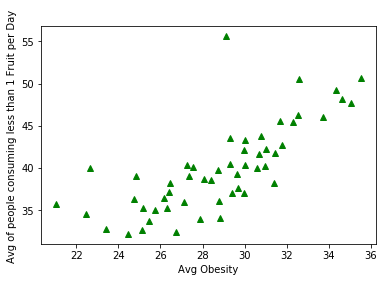

In [54]:
for each in Fruits_Obesity_relation:
    plt.plot([each[0]], [each[1]], 'g^')
plt.xlabel('Avg Obesity')
plt.ylabel('Avg of people consuming less than 1 Fruit per Day ')
plt.show()

### **X-Coordinates = Avg Obesity**
### **Y-Coordinates = Avg of % of people performing Vigerous Aerobic Activity**

In [15]:
VigerousAerboic_Obesity_relation = []
for each in avg_Vigerous_activity.keys():
    if avg_Vigerous_activity[each] == 0 or avg_Vigerous_activity[each] == 0:
        continue
    else:
        VigerousAerboic_Obesity_relation.append((avg_obese_adults[each], avg_Vigerous_activity[each]))

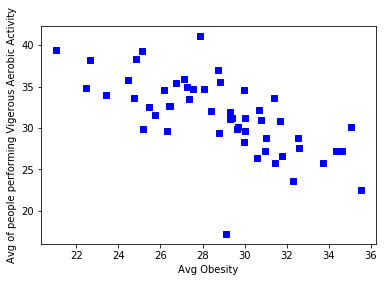

In [16]:
fig, ax = plt.subplots()
for each in VigerousAerboic_Obesity_relation:
    plt.plot([each[0]], [each[1]], 'bs')
plt.xlabel('Avg Obesity')
plt.ylabel('Avg of people performing Vigerous Aerobic Activity')
plt.show()

### ** X-Coordinates = Avg Obesity**
### ** Y-Coordinates = Avg of % of people performing no Physical Activity**

In [17]:
NoPhysical_Obesity_relation = []
for each in avg_NoPhysical.keys():
    if avg_NoPhysical[each] == 0 or avg_NoPhysical[each] == 0:
        continue
    else:
        NoPhysical_Obesity_relation.append((avg_obese_adults[each], avg_NoPhysical[each]))

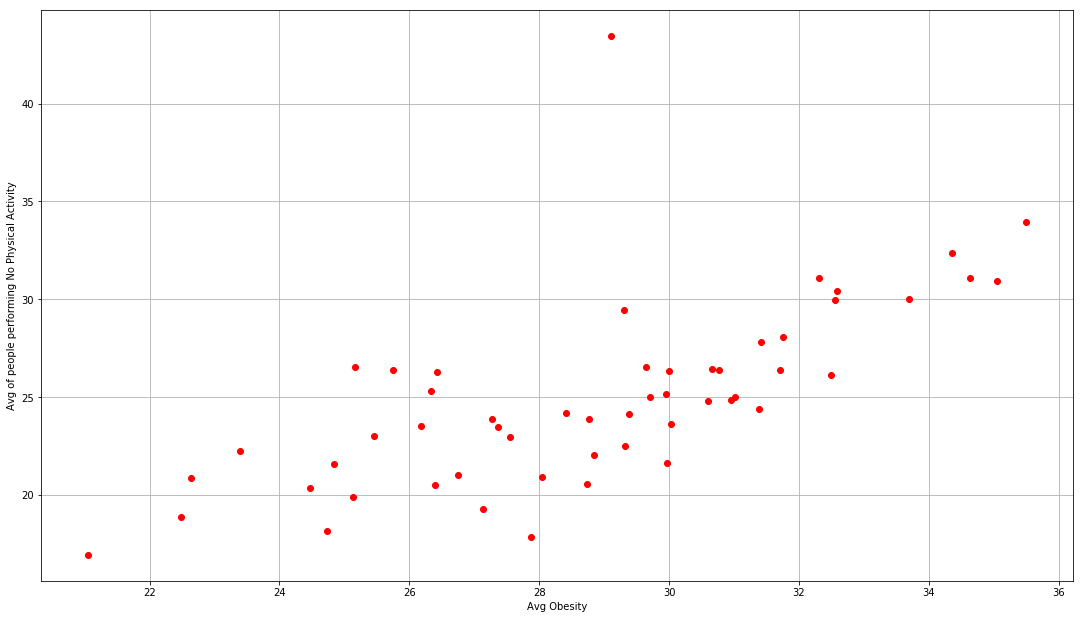

In [57]:
fig, ax = plt.subplots()
for each in NoPhysical_Obesity_relation:
    plt.plot([each[0]], [each[1]], 'ro')
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Avg Obesity')
plt.ylabel('Avg of people performing No Physical Activity')
plt.grid(True)
plt.savefig('images/exploration_no_phy_activity_obesity.pdf', 
            bbox_inches='tight')
plt.show()
fig.clear()

## Question2

### **Obtaining the records containing Data_Values for % Obese adults across the different age groups**

In [39]:
Obese_adults_data = data.loc[data['Question'] == '% Obese Adults']
State_wise_Obese_adults_data = Obese_adults_data.loc[Obese_adults_data['LocationDesc'] != 'National']
Age_wise_Obesity = State_wise_Obese_adults_data.loc[State_wise_Obese_adults_data['StratificationCategory1'] == 'Age (years)']
age_categories = set(Age_wise_Obesity['Stratification1'].tolist())

### **Obtaining the records containing Data_Values for % Strength Training across the age groups**

In [40]:
Strength_data = data.loc[data['Question'] == '% Strength']
State_wise_Strength = Strength_data.loc[Strength_data['LocationDesc'] != 'National']
Age_StrengthTraining = State_wise_Strength.loc[State_wise_Strength['StratificationCategory1'] == 'Age (years)']

### **Obtaining records containing Data_Values for % of sample set consuming less than 1 vegetable per day**


In [41]:
Vegetable_data = data.loc[data['Question'] == '% < 1 Veg / Day']
State_wise_Veg = Vegetable_data.loc[Vegetable_data['LocationDesc'] != 'National']
Age_Vegetable = State_wise_Veg.loc[State_wise_Veg['StratificationCategory1'] == 'Age (years)']

### ** Finding the average % of obese adults across the given age groups**

In [42]:
Obesity_Age_dict = {}
for each in age_categories:
    Obesity_Age_dict[each] = []
    
for index, row in Age_wise_Obesity.iterrows():
    Obesity_Age_dict[row['Stratification1']].append(row['Data_Value'])
    
avg_obesity_age = {}
for each in Obesity_Age_dict.keys():
    avg_obesity_age[each] = stat.mean(Obesity_Age_dict[each])
    

print(avg_obesity_age)

{'55 - 64': 33.56114649681529, '18 - 24': 16.40828025477707, '25 - 34': 27.17452229299363, '65 or older': 26.754458598726114, '45 - 54': 33.853503184713375, '35 - 44': 32.45636942675159}


### **Finding the Average % of people performing Strength Training across different age groups**

In [43]:
Strength_Age_Dict = {}
for each in age_categories:
    Strength_Age_Dict[each] = []
    
for index, row in Age_StrengthTraining.iterrows():
    Strength_Age_Dict[row['Stratification1']].append(row['Data_Value'])
    
avg_strength_age = {}
for each in Strength_Age_Dict.keys():
    avg_strength_age[each] = stat.mean(Strength_Age_Dict[each])
print(avg_strength_age)

{'55 - 64': 23.567096774193548, '18 - 24': 44.93032258064516, '25 - 34': 35.17548387096774, '65 or older': 21.865806451612904, '45 - 54': 26.03548387096774, '35 - 44': 29.56}


### ** Finding the Average % of people eating less than 1 vegetable per Day**

In [44]:
Vegetable_Age_Dict = {}
for each in age_categories:
    Vegetable_Age_Dict[each] = []
    
for index, row in Age_Vegetable.iterrows():
    Vegetable_Age_Dict[row['Stratification1']].append(row['Data_Value'])
    
avg_vegetable_age = {}
for each in Vegetable_Age_Dict.keys():
    avg_vegetable_age[each] = stat.mean(Vegetable_Age_Dict[each])
print(avg_vegetable_age)

{'55 - 64': 21.021290322580644, '18 - 24': 30.83741935483871, '25 - 34': 22.733548387096775, '65 or older': 21.301290322580645, '45 - 54': 22.071612903225805, '35 - 44': 21.389032258064518}


### ** --> Bar Charts <--**

### **Strength Training and Obesity Relation**

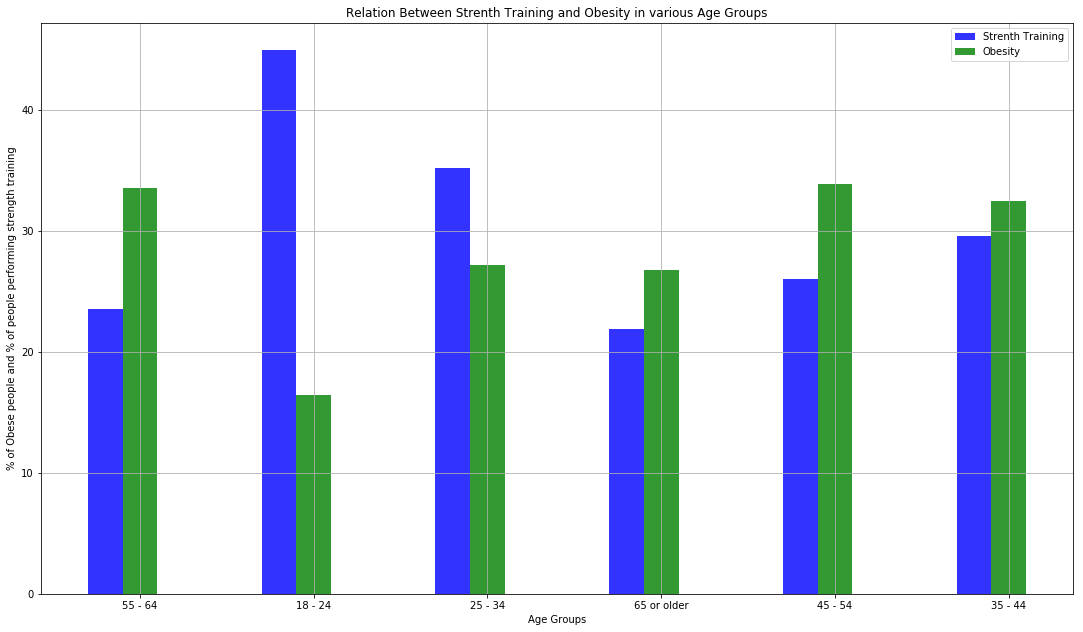

In [77]:
# data to plot
n_groups = 6
strength_values = list(avg_strength_age.values())
obesity_values = list(avg_obesity_age.values())
# means_frank = (90, 55, 40, 65)
# means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index, strength_values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Strenth Training')
 
rects2 = plt.bar(index + bar_width, obesity_values, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Obesity')
 
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Age Groups')
plt.ylabel('% of Obese people and % of people performing strength training')
plt.title('Relation Between Strenth Training and Obesity in various Age Groups')
plt.xticks(index + bar_width, list(avg_strength_age.keys()))
plt.legend()
 
# plt.tight_layout()
plt.grid(True)
plt.savefig('images/exploration_training_obesity.pdf', 
            bbox_inches='tight')
plt.show()
fig.clear()


### ** Vegetable consumption and Obesity Relation**

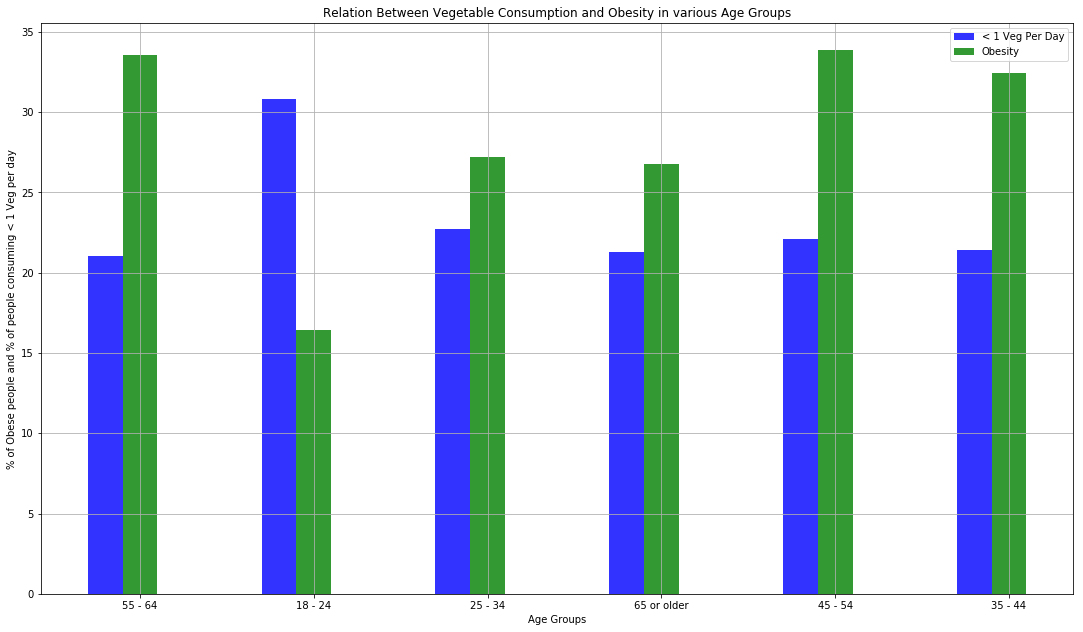

In [70]:
# data to plot
n_groups = 6
vegetable_values = list(avg_vegetable_age.values())
obesity_values = list(avg_obesity_age.values())
# means_frank = (90, 55, 40, 65)
# means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index, vegetable_values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='< 1 Veg Per Day')
 
rects2 = plt.bar(index + bar_width, obesity_values, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Obesity')
 
fig.set_size_inches(18.5, 10.5)

plt.xlabel('Age Groups')
plt.ylabel('% of Obese people and % of people consuming < 1 Veg per day')
plt.title('Relation Between Vegetable Consumption and Obesity in various Age Groups')
plt.xticks(index + bar_width, list(avg_vegetable_age.keys()))
plt.legend()
 
# plt.tight_layout()
plt.grid(True)
plt.savefig('images/exploration_veg_malnutrition_obesity.pdf', 
            bbox_inches='tight')
plt.show()
fig.clear()

### ** Obtaining the Data_values for % of people consuming < 1 vegetable per day across education categories**

In [71]:
veg_data = data.loc[data['Question'] == '% < 1 Veg / Day']
State_wise_veg = veg_data.loc[veg_data['LocationDesc'] != 'National']
education_veg = State_wise_veg.loc[State_wise_veg['StratificationCategory1'] == 'Education']
education_categories = set(education_veg['Stratification1'].tolist())
edu_categories = {'HS_grad', 'College', 'college_grad', 'HS_Dropout'}

### ** Obtaining the Data_Values for % of people performing Vigerous Aerobic Activity across education categories**

In [72]:
aerobic_data = data.loc[data['Question'] == '% Vigerous Aerobic']
State_wise_aerobic = aerobic_data.loc[aerobic_data['LocationDesc'] != 'National']
education_aerobic = State_wise_aerobic.loc[State_wise_aerobic['StratificationCategory1'] == 'Education']

### ** Finding the average % of people eating < 1 vegetable per day (Education)**

In [73]:
Veg_Education_Dict = {}
for each in education_categories:
    Veg_Education_Dict[each] = []
    
for index, row in education_veg.iterrows():
    Veg_Education_Dict[row['Stratification1']].append(row['Data_Value'])
    
avg_veg_education = {}
for each in Veg_Education_Dict.keys():
    avg_veg_education[each] = stat.mean(Veg_Education_Dict[each])
print(avg_veg_education)

{'College graduate': 14.298064516129033, 'Some college or technical school': 21.24967741935484, 'Less than high school': 33.31677419354839, 'High school graduate': 27.95741935483871}


### ** Finding Average % of people performing vigerous aerobic activity (Education)**

In [74]:
Aerobic_Education_Dict = {}
for each in education_categories:
    Aerobic_Education_Dict[each] = []
    
for index, row in education_aerobic.iterrows():
    Aerobic_Education_Dict[row['Stratification1']].append(row['Data_Value'])
    
avg_aerobic_education = {}
for each in Aerobic_Education_Dict.keys():
    avg_aerobic_education[each] = stat.mean(Aerobic_Education_Dict[each])
print(avg_aerobic_education)

{'College graduate': 35.656129032258065, 'Some college or technical school': 32.17548387096774, 'Less than high school': 25.97806451612903, 'High school graduate': 30.323870967741936}


### **Vegetable Consumption and Aerobic Activity(Education)**

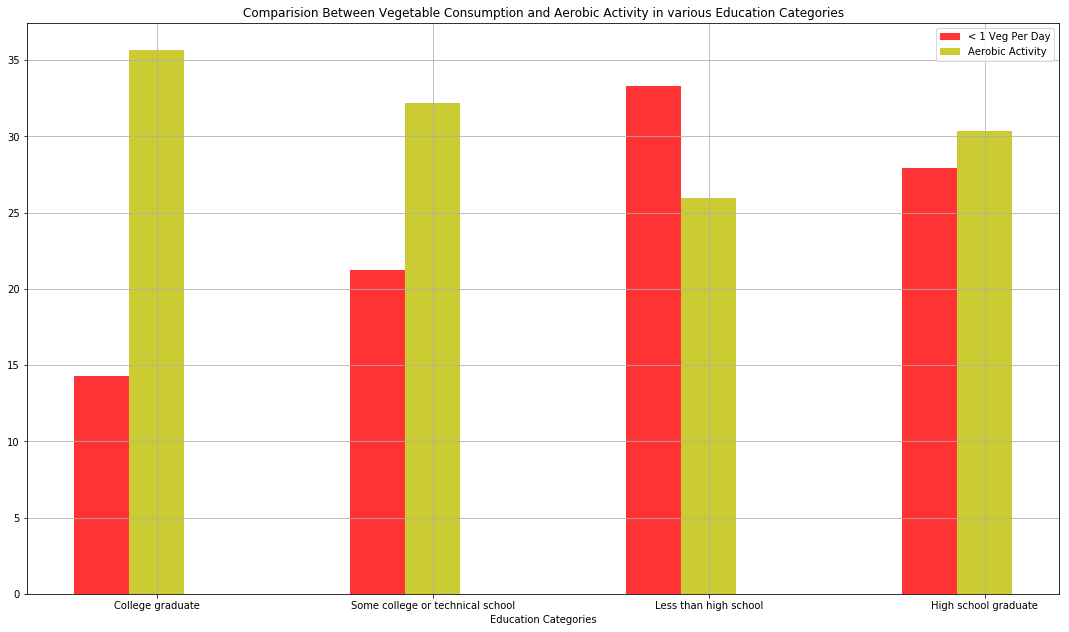

In [76]:
# data to plot
n_groups = 4
vegetable_values = list(avg_veg_education.values())
aerobic_values = list(avg_aerobic_education.values())
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8
 
rects1 = plt.bar(index, vegetable_values, bar_width,
                 alpha=opacity,
                 color='r',
                 label='< 1 Veg Per Day')
 
rects2 = plt.bar(index + bar_width, aerobic_values, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Aerobic Activity')

fig.set_size_inches(18.5, 10.5)

plt.xlabel('Education Categories')
# plt.ylabel('% consuming < 1 Veg per day and % performing vigerous aerobic activity')
plt.title('Comparision Between Vegetable Consumption and Aerobic Activity in various Education Categories')
plt.xticks(index + bar_width, list(avg_veg_education.keys()))
plt.legend()
 
# plt.tight_layout()
plt.grid(True)
plt.savefig('images/exploration_aerobic_malnutrition.pdf', 
            bbox_inches='tight')
plt.show()
fig.clear()